<a href="https://colab.research.google.com/github/RavindraKushwaha23/Machine-Learning/blob/main/Complete_Stock_Market_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description: This  program uses an artificial recurrent neural network called Long Short Term Memory(LSTM)
#             to predict the closing stock price of a corporation(TESLA) using the past 60 day stock price.



**RNN:** A recurrent neural network is a class of artificial neural networks where connections between nodes form a directed or undirected graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior

**Long short-term memory (LSTM)** :is an artificial recurrent neural network (RNN) architecture[1] used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition, speech recognition and anomaly detection in network traffic or IDSs (intrusion detection systems). 


In [ ]:
!pip install yahoo-fin

In [3]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from yahoo_fin.stock_info import *
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Get the stock quote
#Show the data
df = get_data("TSLA")
df
# df.head()

,open,high,low,close,adjclose,volume,ticker
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,TSLA
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,TSLA
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,TSLA
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,TSLA
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,TSLA
...,...,...,...,...,...,...,...
2022-07-19,735.000000,741.419983,710.929993,736.590027,736.590027,26963400,TSLA
2022-07-20,740.349976,751.989990,730.450012,742.500000,742.500000,29621400,TSLA
2022-07-21,765.320007,819.799988,764.599976,815.119995,815.119995,47344100,TSLA
2022-07-22,828.659973,842.359985,812.140015,816.729980,816.729980,34421200,TSLA


In [5]:
#Get the number of rows and columns in the data set
df.shape

(3039, 7)

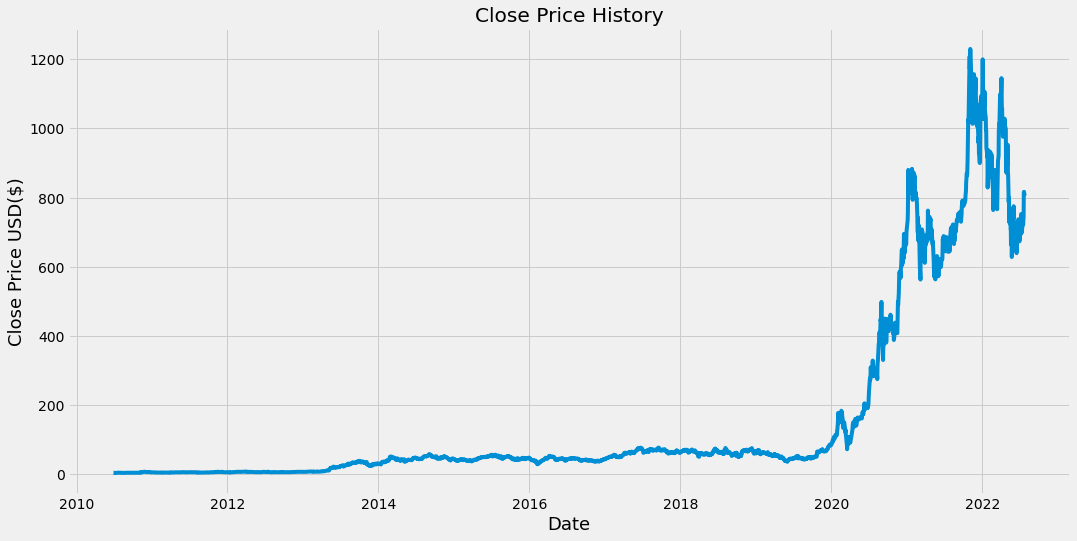

In [6]:
#Visualize  the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [7]:
#Create a new dataframe with only the 'Close column
data=df.filter(['close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

2432

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.66187893],
       [0.66319132],
       [0.65387403]])

In [9]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([1.31893193e-03, 1.30914992e-03, 1.00427966e-03, 5.54310014e-04,
       5.05398786e-05, 0.00000000e+00, 2.70633795e-04, 2.60851783e-04,
       2.03790498e-04, 3.81495759e-04, 6.58650766e-04, 6.66802378e-04,
       7.89076560e-04, 9.96127858e-04, 7.33645675e-04, 7.20603251e-04,
       8.47768245e-04, 8.95047712e-04, 8.39616827e-04, 7.74403930e-04,
       8.02119373e-04, 7.41797482e-04, 6.74953990e-04, 8.34725821e-04,
       1.00264907e-03, 8.90156706e-04, 7.58100706e-04, 6.17892705e-04,
       6.19523105e-04, 5.26594571e-04, 3.42367904e-04, 2.93458231e-04,
       4.10841601e-04, 4.85836511e-04, 5.46158402e-04, 4.84206111e-04,
       4.87466717e-04, 5.38006790e-04, 7.05930233e-04, 5.54310014e-04,
       6.68432778e-04, 6.43977942e-04, 6.35826329e-04, 6.63541772e-04,
       5.99959081e-04, 7.58100706e-04, 8.57550257e-04, 8.55920051e-04,
       7.72773336e-04, 8.31465021e-04, 8.00489167e-04, 7.12451445e-04,
       8.02119373e-04, 8.67332270e-04, 1.00754008e-03, 8.37986621e-04,
     

In [10]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [11]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2372, 60, 1)

In [12]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2372/2372 [==============================] - 86s 35ms/step - loss: 2.4765e-05


In [15]:
model.save(('keras_model.h5'))

In [16]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [17]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

441.4533280776399

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


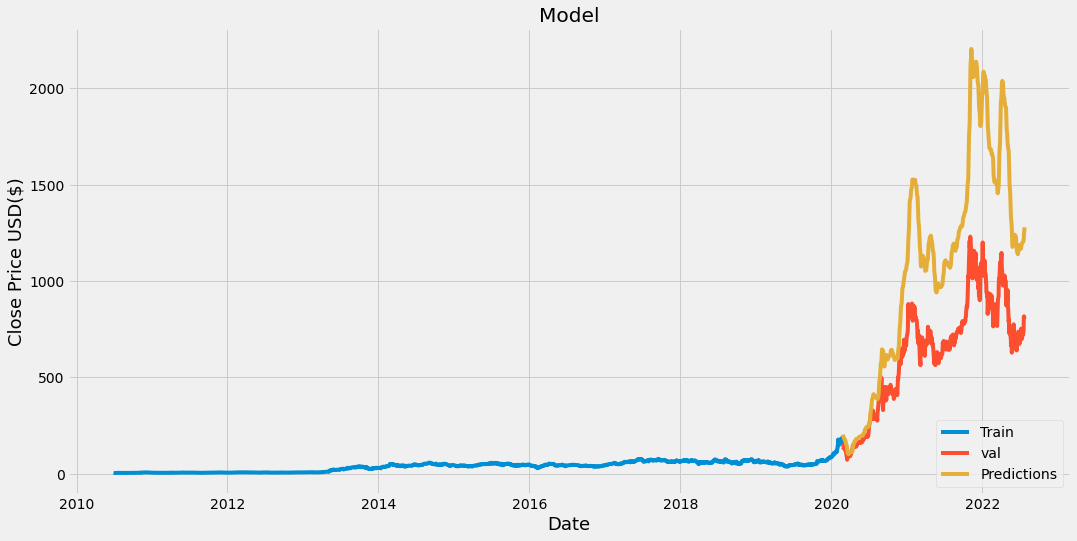

In [21]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'val', 'Predictions'], loc= 'lower right')
plt.show()

In [22]:
#Show the valid and predicted prices
valid

,close,Predictions
2020-02-27,135.800003,202.809052
2020-02-28,133.598007,196.059235
2020-03-02,148.723999,188.075180
2020-03-03,149.102005,183.065933
2020-03-04,149.899994,180.044617
...,...,...
2022-07-19,736.590027,1206.742920
2022-07-20,742.500000,1213.602783
2022-07-21,815.119995,1222.552612
2022-07-22,816.729980,1248.023438


In [23]:
#Get the quote
tsla_quote = get_data("TSLA")
#Create a new data frame
new_df = tsla_quote.filter(['close'])
#Get the last 60 dat closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
x_test=[]
#Append the past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1306.2395]]


In [24]:
#Get the quote
tsla_quote2 = get_data("TSLA")
print(tsla_quote2['close'])

2010-06-29      4.778000
2010-06-30      4.766000
2010-07-01      4.392000
2010-07-02      3.840000
2010-07-06      3.222000
                 ...    
2022-07-19    736.590027
2022-07-20    742.500000
2022-07-21    815.119995
2022-07-22    816.729980
2022-07-25    805.299988
Name: close, Length: 3039, dtype: float64


In [25]:
new_df.tail()

,close
2022-07-19,736.590027
2022-07-20,742.500000
2022-07-21,815.119995
2022-07-22,816.729980
2022-07-25,805.299988
